In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("./generic-food.csv")

In [4]:
print(len(df))
df.head()

907


,FOOD NAME,SCIENTIFIC NAME,GROUP,SUB GROUP
0,Angelica,Angelica keiskei,Herbs and Spices,Herbs
1,Savoy cabbage,Brassica oleracea var. sabauda,Vegetables,Cabbages
2,Silver linden,Tilia argentea,Herbs and Spices,Herbs
3,Kiwi,Actinidia chinensis,Fruits,Tropical fruits
4,Allium (Onion),Allium,Vegetables,Onion-family vegetables


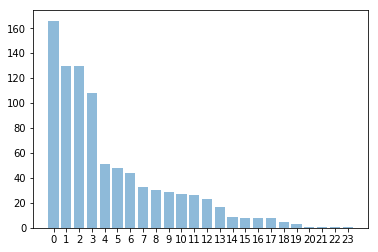

In [8]:
import matplotlib.pyplot as plt
import numpy as np 
%matplotlib inline

counts = df.GROUP.value_counts()
values = counts.tolist()
labels = counts.index.tolist()


y_pos = np.arange(len(labels))

 
plt.bar(y_pos, values, align='center', alpha=0.5)
plt.xticks(y_pos, range(len(labels)))

 
plt.show()

In [10]:
list(df.GROUP.unique())

['Herbs and Spices',
 'Vegetables',
 'Fruits',
 'Nuts',
 'Cereals and cereal products',
 'Pulses',
 'Teas',
 'Gourds',
 'Coffee and coffee products',
 'Soy',
 'Cocoa and cocoa products',
 'Beverages',
 'Aquatic foods',
 'Animal foods',
 'Milk and milk products',
 'Eggs',
 'Confectioneries',
 'Baking goods',
 'Dishes',
 'Snack foods',
 'Baby foods',
 'Unclassified',
 'Fats and oils',
 'Herbs and spices']

In [18]:
print("\n".join(list(df[df['GROUP'] ==  'Animal foods']['FOOD NAME'])).lower())

beaver
bison
black bear
wild boar
brown bear
buffalo
caribou
chicken (cock, hen, rooster)
mule deer
mallard duck
elk
emu
greylag goose
guinea hen
horse
moose
muskrat
opossum
ostrich
velvet duck
pheasant
polar bear
european rabbit
raccoon
sheep (mutton, lamb)
squab
squirrel
turkey
cattle (beef, veal)
deer
arctic ground squirrel
rabbit
domestic goat
beefalo
antelope
domestic pig (piglet, pork)
great horned owl
quail
anatidae (duck, goose, swan)
mountain hare
rock ptarmigan
columbidae (dove, pigeon)
other meat product
animal foods


In [5]:
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer
from sklearn.feature_extraction.text import *

vectors = TfidfVectorizer().fit_transform(df['FOOD NAME'])
X_reduced = TruncatedSVD(n_components=5, random_state=0).fit_transform(vectors)
X_embedded = TSNE(n_components=2, perplexity=5, verbose=0).fit_transform(X_reduced)

/Users/romakindmitriy/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


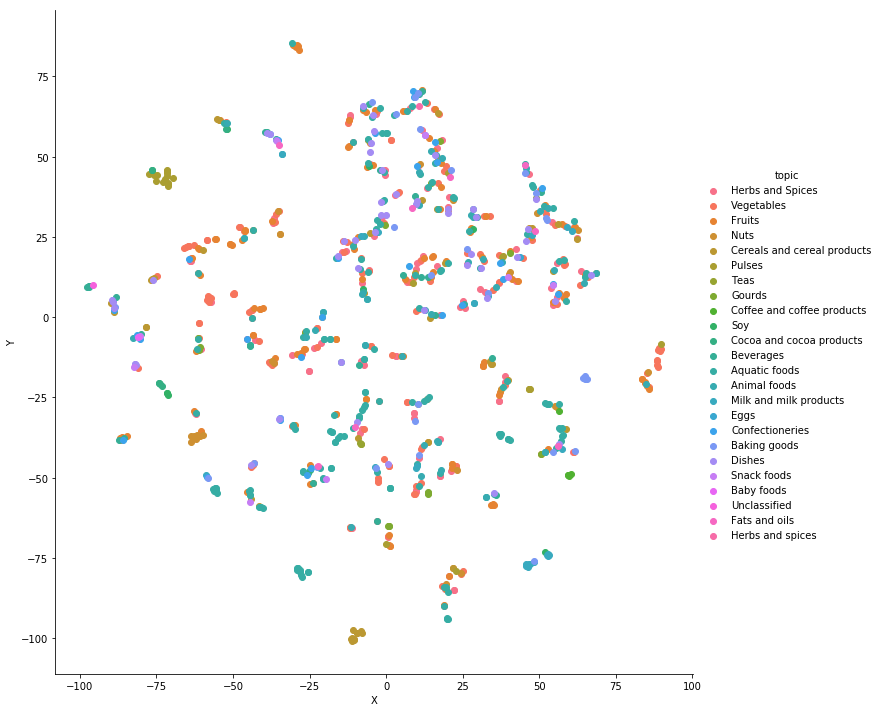

In [7]:
from pylab import pcolor, show, colorbar, xticks, yticks
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

vis_df = pd.DataFrame({'X': X_embedded[:, 0], 'Y': X_embedded[:, 1], 'topic' : df['GROUP']})
sns.FacetGrid(vis_df, hue="topic", size=10).map(plt.scatter, "X", "Y").add_legend()